In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd


In [36]:
import os
import zipfile
dataset_path = "animal_data.zip"
dir = "animal_data" 

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(dir)

data= os.path.join(dir, 'animal_data')

In [37]:


df = pd.DataFrame({"path":[],"label":[]}) 
label_list = ['Bear','Bird','Cat','Cow','Deer','Dog','Dolphin','Elephant','Giraffe','Horse','Kangaroo','Lion','Panda','Tiger','Zebra']


for i, label in enumerate(label_list):
    img_path = os.path.join(data, label)
    img_list = glob(img_path+'/*.jpg')
    for img in img_list:
        new_data =pd.DataFrame({"path":img,"label":label}, index=[1])
        df = pd.concat([df, new_data], ignore_index=True)  

df[["path"]] = df[["path"]].astype(str)
df[["label"]] = df[["label"]].astype(str)

accessing the info

In [38]:
df.head()

,path,label
0,animal_data\animal_data\Bear\bear_1.jpg,Bear
1,animal_data\animal_data\Bear\Bear_10.jpg,Bear
2,animal_data\animal_data\Bear\Bear_10_1.jpg,Bear
3,animal_data\animal_data\Bear\Bear_10_2.jpg,Bear
4,animal_data\animal_data\Bear\Bear_10_3.jpg,Bear


In [134]:
print(df.label.unique())

['Bear' 'Bird' 'Cat' 'Cow' 'Deer' 'Dog' 'Dolphin' 'Elephant' 'Giraffe'
 'Horse' 'Kangaroo' 'Lion' 'Panda' 'Tiger' 'Zebra']


[[[0.62352941 0.69803922 0.51764706]
  [0.61960784 0.69411765 0.51372549]
  [0.63529412 0.72156863 0.54117647]
  ...
  [0.69019608 0.74509804 0.61568627]
  [0.68235294 0.73333333 0.61568627]
  [0.67843137 0.72941176 0.61176471]]

 [[0.62745098 0.70196078 0.5254902 ]
  [0.62352941 0.69803922 0.52156863]
  [0.63921569 0.7254902  0.54509804]
  ...
  [0.68235294 0.74117647 0.61176471]
  [0.68235294 0.7372549  0.60784314]
  [0.68235294 0.74117647 0.61176471]]

 [[0.63921569 0.70980392 0.54509804]
  [0.63529412 0.70980392 0.53333333]
  [0.64313725 0.72941176 0.54901961]
  ...
  [0.67058824 0.7372549  0.59607843]
  [0.6745098  0.7372549  0.59607843]
  [0.67843137 0.74509804 0.60392157]]

 ...

 [[0.58431373 0.65882353 0.40784314]
  [0.58039216 0.65098039 0.40784314]
  [0.63137255 0.69803922 0.49411765]
  ...
  [0.70196078 0.78039216 0.58823529]
  [0.68627451 0.76862745 0.6       ]
  [0.67843137 0.76078431 0.6       ]]

 [[0.57647059 0.65098039 0.39215686]
  [0.57647059 0.64705882 0.40392157]


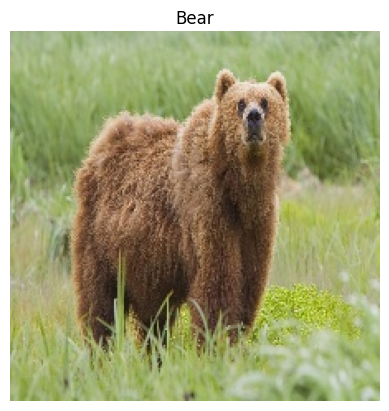

[[[0.61176471 0.6627451  0.62352941]
  [0.60392157 0.65882353 0.60784314]
  [0.61176471 0.6627451  0.59607843]
  ...
  [0.94509804 0.94901961 0.96862745]
  [0.94509804 0.94901961 0.96862745]
  [0.94509804 0.94901961 0.96862745]]

 [[0.61568627 0.66666667 0.62745098]
  [0.59607843 0.65098039 0.6       ]
  [0.59215686 0.64313725 0.57647059]
  ...
  [0.94117647 0.94509804 0.96470588]
  [0.9372549  0.94117647 0.96078431]
  [0.9372549  0.94117647 0.96078431]]

 [[0.58823529 0.64313725 0.59215686]
  [0.58039216 0.63529412 0.57647059]
  [0.58431373 0.63137255 0.57647059]
  ...
  [0.93333333 0.9372549  0.95686275]
  [0.93333333 0.9372549  0.95686275]
  [0.92941176 0.93333333 0.95294118]]

 ...

 [[0.59215686 0.56078431 0.50980392]
  [0.44313725 0.41960784 0.36470588]
  [0.24705882 0.22352941 0.16862745]
  ...
  [0.58039216 0.52156863 0.44705882]
  [0.6        0.54901961 0.48627451]
  [0.63137255 0.58431373 0.52941176]]

 [[0.34509804 0.30980392 0.25098039]
  [0.17647059 0.14901961 0.08627451]


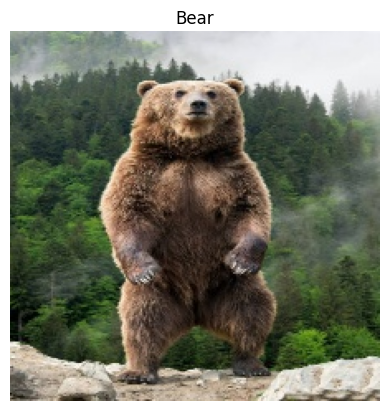

In [ ]:
import matplotlib.image as mpimg
a=df.path[0:2]
for af in a:
    image_path = os.path.join(af)

    
    img = mpimg.imread(image_path)
    img=img/255
    print(img)
    plt.imshow(img)
    plt.axis('off') 
    plt.title(df.label[0])
    plt.show()

In [143]:
X=df['path']
y=df['label']

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def preprocess(image_paths):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=(96,96))  
        img_array = img_to_array(img)  
        img_array = img_array / 255.0  
        images.append(img_array)
    return np.array(images)
X=preprocess(X)

In [145]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)


In [146]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96,96,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),                          
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),                                   
    tf.keras.layers.Dense(15, activation='softmax')                                  
    ])



optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,986,383 (15.21 MB)

 Trainable params: 3,986,383 (15.21 MB)

 Non-trainable params: 0 (0.00 B)

In [151]:

model.fit(Xtrain,ytrain,epochs=40)

Epoch 1/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7135 - loss: 1.1807
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7585 - loss: 1.0565
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7738 - loss: 1.0197
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7931 - loss: 1.0084
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.8021 - loss: 0.9314
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8271 - loss: 0.8696
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8616 - loss: 0.7962
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8569 - loss: 0.7861
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8749 - loss: 0.7237
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8888 - loss: 0.6490
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9000 - loss: 0.6365
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy:

In [160]:
results = model.evaluate(Xtest,ytest)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6414 - loss: 2.5426
Loss =  2.9809889793395996
Accuracy =  59.71660017967224 %


In [177]:

predictions = model.predict(Xtest)
label=label_list[np.argmax(predictions[1])]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


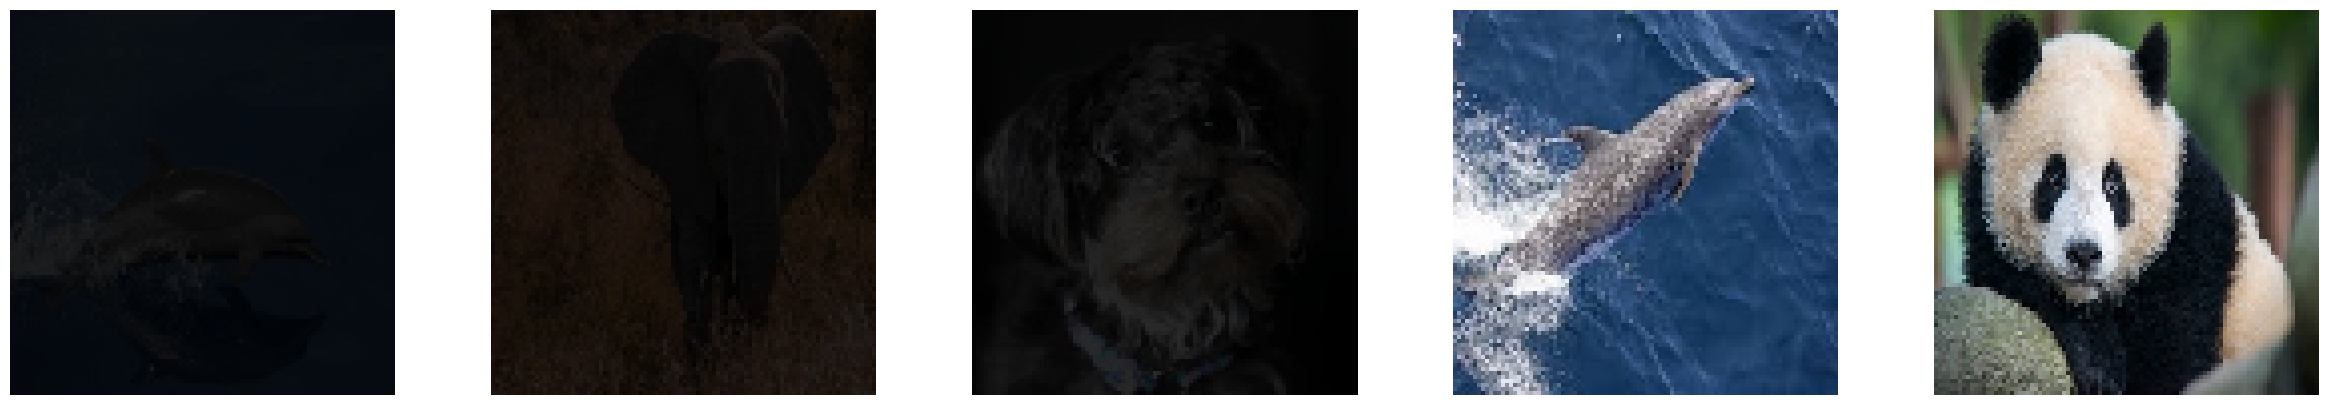

Predicted value: 
Dolphin                           Kangaroo                           Dog                           Dolphin                           Panda                           

In [175]:

index = np.random.choice(Xtest.shape[0],5)

fig, axes = plt.subplots(1, n, figsize=(30, 5))

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(Xtest[ind])
    plt.axis("off")
    

plt.show()
print("Predicted value: ")

for i,ind in enumerate(index):
    prob = model.predict(Xtest[ind].reshape(1,96,96,3),verbose=0)[0]
    label = label_list[np.argmax(prob)]
    print(label,end="                           ")